In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

**Mounting the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/data.xlsx")

**Data Preparation and Cleaning**

In [ ]:
data['commodity_name'].value_counts()

commodity_name
Maize        37046
Banana       27024
Rice         26688
Groundnut    21134
Cotton       17630
Papaya       16674
Mango        15126
Orange        5136
Coconut       4042
Grapes        3832
Jute          1626
Coffee         120
Name: count, dtype: int64

In [ ]:
data = data[data['commodity_name'] != 'Grapes']

In [ ]:
data.isnull().sum()

commodity_name    0
state             0
district          0
min_price         0
max_price         0
modal_price       0
date              0
N                 0
P                 0
K                 0
temperature       0
humidity          0
ph                0
rainfall          0
dtype: int64

In [ ]:
data.to_excel('edited_crops_data.xlsx', index=False)

In [ ]:
data.head(5)

,commodity_name,state,district,min_price,max_price,modal_price,date,N,P,K,temperature,humidity,ph,rainfall
0,Rice,Assam,Nagaon,26.0,27.5,27.0,2019-05-22,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,Rice,Assam,Nagaon,26.0,28.0,27.5,2019-05-23,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,Rice,Assam,Nagaon,25.0,27.5,26.0,2019-05-28,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,Rice,Assam,Nagaon,25.0,27.0,26.0,2019-05-27,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,Rice,Assam,Nagaon,26.0,29.0,27.5,2019-05-24,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


In [ ]:
data['state'].value_counts()

state
Uttar Pradesh        63624
Gujarat              18602
Karnataka            14376
Maharashtra          13398
Punjab                8970
Tamil Nadu            8430
Madhya Pradesh        7122
Kerala                6352
Rajasthan             5890
Telangana             4696
Haryana               4104
Himachal Pradesh      4060
West Bengal           3876
Uttrakhand            2976
Andhra Pradesh        1254
Jammu and Kashmir     1036
Tripura                954
Odisha                 934
Assam                  650
Chattisgarh            622
NCT of Delhi           320
Name: count, dtype: int64

In [ ]:
data

,commodity_name,state,district,min_price,max_price,modal_price,date,N,P,K,temperature,humidity,ph,rainfall
0,Rice,Assam,Nagaon,26.0,27.5,27.0,2019-05-22,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,Rice,Assam,Nagaon,26.0,28.0,27.5,2019-05-23,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,Rice,Assam,Nagaon,25.0,27.5,26.0,2019-05-28,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,Rice,Assam,Nagaon,25.0,27.0,26.0,2019-05-27,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,Rice,Assam,Nagaon,26.0,29.0,27.5,2019-05-24,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176073,Banana,Uttar Pradesh,Etah,21.0,22.3,21.7,2021-09-28,115.0,77.0,46.0,25.162782,84.978492,6.110845,90.945546
176074,Banana,Uttar Pradesh,Jhansi,18.5,20.5,19.5,2021-09-28,112.0,93.0,54.0,25.787498,84.511942,6.020445,114.200546
176075,Banana,Uttar Pradesh,Balrampur,25.0,25.7,25.3,2021-09-28,105.0,84.0,50.0,25.341198,84.473213,6.435917,91.064934
176076,Banana,Punjab,Sangrur,15.0,16.0,15.5,2021-09-28,109.0,78.0,52.0,27.912210,83.363077,6.356091,90.242115


In [ ]:
cols = data.columns.tolist()
cols.append(cols.pop(0))
data = data[cols]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data['label_numeric'] = label_encoder.fit_transform(data['commodity_name'])

label_encoder_1 = LabelEncoder()
data['state_numeric'] = label_encoder_1.fit_transform(data['state'])
data['district_numeric'] = label_encoder_1.fit_transform(data['district'])

<ipython-input-13-0ea1c160902f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label_numeric'] = label_encoder.fit_transform(data['commodity_name'])
<ipython-input-13-0ea1c160902f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_numeric'] = label_encoder_1.fit_transform(data['state'])
<ipython-input-13-0ea1c160902f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
data

,state,district,min_price,max_price,modal_price,date,N,P,K,temperature,humidity,ph,rainfall,commodity_name,label_numeric,state_numeric,district_numeric
0,Assam,Nagaon,26.0,27.5,27.0,2019-05-22,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,Rice,10,1,268
1,Assam,Nagaon,26.0,28.0,27.5,2019-05-23,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,Rice,10,1,268
2,Assam,Nagaon,25.0,27.5,26.0,2019-05-28,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,Rice,10,1,268
3,Assam,Nagaon,25.0,27.0,26.0,2019-05-27,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,Rice,10,1,268
4,Assam,Nagaon,26.0,29.0,27.5,2019-05-24,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,Rice,10,1,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176073,Uttar Pradesh,Etah,21.0,22.3,21.7,2021-09-28,115.0,77.0,46.0,25.162782,84.978492,6.110845,90.945546,Banana,0,18,114
176074,Uttar Pradesh,Jhansi,18.5,20.5,19.5,2021-09-28,112.0,93.0,54.0,25.787498,84.511942,6.020445,114.200546,Banana,0,18,181
176075,Uttar Pradesh,Balrampur,25.0,25.7,25.3,2021-09-28,105.0,84.0,50.0,25.341198,84.473213,6.435917,91.064934,Banana,0,18,33
176076,Punjab,Sangrur,15.0,16.0,15.5,2021-09-28,109.0,78.0,52.0,27.912210,83.363077,6.356091,90.242115,Banana,0,13,329


In [ ]:
data['month'] = data['date'].dt.month.astype(float)

data.drop(columns='date', inplace=True)

<ipython-input-15-3338da15bc8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month.astype(float)
<ipython-input-15-3338da15bc8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='date', inplace=True)


**Splitting the dataset**

In [ ]:
X = data.drop(columns = ['commodity_name', 'state', 'district', 'label_numeric', 'min_price', 'max_price', 'modal_price'], axis = 1)
Y = data['label_numeric']
P = data[['commodity_name', 'state_numeric', 'district_numeric', 'min_price', 'max_price', 'modal_price']]

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall,state_numeric,district_numeric,month
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,1,268,5.0
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,1,268,5.0
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,1,268,5.0
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,1,268,5.0
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,1,268,5.0
...,...,...,...,...,...,...,...,...,...,...
176073,115.0,77.0,46.0,25.162782,84.978492,6.110845,90.945546,18,114,9.0
176074,112.0,93.0,54.0,25.787498,84.511942,6.020445,114.200546,18,181,9.0
176075,105.0,84.0,50.0,25.341198,84.473213,6.435917,91.064934,18,33,9.0
176076,109.0,78.0,52.0,27.912210,83.363077,6.356091,90.242115,13,329,9.0


In [ ]:
Y

0         10
1         10
2         10
3         10
4         10
          ..
176073     0
176074     0
176075     0
176076     0
176077     0
Name: label_numeric, Length: 172246, dtype: int64

In [ ]:
P

,commodity_name,state_numeric,district_numeric,min_price,max_price,modal_price
0,Rice,1,268,26.0,27.5,27.0
1,Rice,1,268,26.0,28.0,27.5
2,Rice,1,268,25.0,27.5,26.0
3,Rice,1,268,25.0,27.0,26.0
4,Rice,1,268,26.0,29.0,27.5
...,...,...,...,...,...,...
176073,Banana,18,114,21.0,22.3,21.7
176074,Banana,18,181,18.5,20.5,19.5
176075,Banana,18,33,25.0,25.7,25.3
176076,Banana,13,329,15.0,16.0,15.5


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 20)

print(X.shape, X_train.shape, X_test.shape)

(172246, 10) (137796, 10) (34450, 10)


**Multiple Crop Prediction System**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

Applying Grid Search to get best_n_neighbors

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best parameter
best_n_neighbors = grid_search.best_params_['n_neighbors']
print("Best n_neighbors:", best_n_neighbors)

# Use the best parameter to train the model
best_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_model.fit(X_train, Y_train)

# Evaluate the accuracy of the best model
y_pred_best_knn = best_model.predict(X_test)
accuracy_best = accuracy_score(Y_test, y_pred_best_knn)
print("Accuracy of the best K-Nearest Neighbors model:", accuracy_best)

Best n_neighbors: 3
Accuracy of the best K-Nearest Neighbors model: 0.9982583454281567


Get user inputs and generate array of suitable crops

In [ ]:
import time

# Define a dictionary mapping integer labels to their corresponding strings
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Assuming you have obtained the output of KNN model as an input array and stored it in the `input_array` variable
input_array = []  # Example input array

# Convert input array back to strings array
output_array = [label_mapping[label] for label in input_array]

# Print out the strings array
print(output_array)

# Existing KNN model code
input_N = float(input("Enter the value of N: "))
input_P = float(input("Enter the value of P: "))
input_K = float(input("Enter the value of K: "))
input_temperature = float(input("Enter the value of temperature: "))
input_humidity = float(input("Enter the value of humidity: "))
input_pH = float(input("Enter the value of pH: "))
input_rainfall = float(input("Enter the value of rainfall: "))
input_state = float(input("Enter the state: "))
input_district = float(input("Enter the district: "))
input_month = float(input("Enter the month (1-12): "))

input_parameters = [[input_N, input_P, input_K, input_temperature, input_humidity, input_pH, input_rainfall, input_state, input_district,  input_month]]
input_parameters = scaler.transform(input_parameters)

start_time = time.time()

nearest_neighbors = NearestNeighbors(n_neighbors=best_n_neighbors, algorithm='ball_tree')
nearest_neighbors.fit(X_train)

distances, indices = nearest_neighbors.kneighbors(input_parameters)

predicted_labels_knn = [Y_train.iloc[i] for i in indices[0]]

print("Predicted", len(predicted_labels_knn), "nearest label values:", predicted_labels_knn)

predicted_labels_knn = [Y_train.iloc[i] for i in indices[0]]
unique_predicted_labels_knn = list(set(predicted_labels_knn))

# Convert predicted labels to strings array
predicted_strings_knn = [label_mapping[label] for label in unique_predicted_labels_knn]

print("Unique predicted nearest label values:", unique_predicted_labels_knn)
print("Predicted", len(predicted_strings_knn), "nearest string values:", predicted_strings_knn)

end_time = time.time()
model_building_time_knn = end_time - start_time

print("Model building time: {:.2f} seconds".format(model_building_time_knn))

[]
Enter the value of N: 10
Enter the value of P: 10
Enter the value of K: 10
Enter the value of temperature: 10
Enter the value of humidity: 10
Enter the value of pH: 1
Enter the value of rainfall: 110
Enter the state: 10
Enter the district: 100
Enter the month (1-12): 10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted 3 nearest label values: [4, 4, 4]
Unique predicted nearest label values: [4]
Predicted 1 nearest string values: ['Groundnut']
Model building time: 0.25 seconds


In [ ]:
# Assuming `predicted_strings_knn` is a list of predicted strings
if len(predicted_strings_knn) == 1:
    # Find the min_price, max_price, and modal_price for the single commodity_name
    commodity_name_knn = predicted_strings_knn[0]
    commodity_data = data[data['commodity_name'] == commodity_name_knn]
    min_price_knn = commodity_data['min_price'].max()
    max_price_knn = commodity_data['max_price'].max()
    modal_price_knn = commodity_data['modal_price'].max()

    print("Commodity Name:", commodity_name_knn)
    print("Min Price:", min_price_knn)
    print("Max Price:", max_price_knn)
    print("Modal Price:", modal_price_knn)

elif len(predicted_strings_knn) > 1:
    # Find the min_price, max_price, and modal_price for all commodity_names in predicted_strings_knn
    prices = {}
    for commodity_name_knn in predicted_strings_knn:
        commodity_data = data[data['commodity_name'] == commodity_name_knn]
        min_price = commodity_data['min_price'].max()
        max_price = commodity_data['max_price'].max()
        modal_price = commodity_data['modal_price'].max()
        prices[commodity_name_knn] = {'min_price': min_price, 'max_price': max_price, 'modal_price': modal_price}

    # Find the commodity with the maximum max_price and minimum min_price
    max_max_price = max(prices, key=lambda x: prices[x]['max_price'])
    min_min_price = min(prices, key=lambda x: prices[x]['min_price'])

    print("Commodity Name with Max Price:", max_max_price)
    print("Max Price:", prices[max_max_price]['max_price'])
    print("Min Price:", prices[max_max_price]['min_price'])
    print("Modal Price:", prices[max_max_price]['modal_price'])

else:
    # If there are no predicted strings or only one, print the details for that single commodity
    print("Commodity Name:", predicted_strings_knn[0])
    print("Min Price:", min_price_knn)
    print("Max Price:", max_price_knn)
    print("Modal Price:", modal_price_knn)

Commodity Name: Groundnut
Min Price: 110.0
Max Price: 450.9
Modal Price: 118.0


Recommend crop based on the price

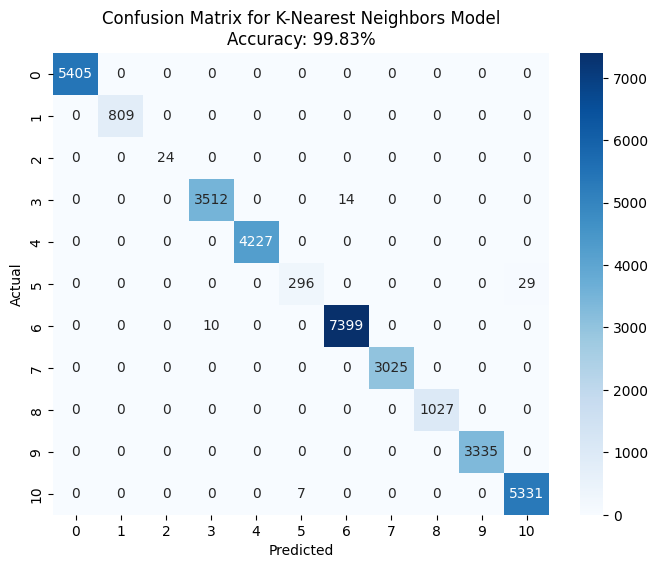

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(Y_test, y_pred_best_knn)

accuracy_knn = accuracy_score(Y_test, y_pred_best_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors Model\nAccuracy: {:.2f}%'.format(accuracy_knn * 100))
plt.show()

Random Forest

In [ ]:
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors

# Take input values from the user
input_N = float(input("Enter the value of N: "))
input_P = float(input("Enter the value of P: "))
input_K = float(input("Enter the value of K: "))
input_temperature = float(input("Enter the value of temperature: "))
input_humidity = float(input("Enter the value of humidity: "))
input_pH = float(input("Enter the value of pH: "))
input_rainfall = float(input("Enter the value of rainfall: "))
input_state = float(input("Enter the state: "))
input_district = float(input("Enter the district: "))
input_month = float(input("Enter the month (1-12): "))

input_parameters = [[input_N, input_P, input_K, input_temperature, input_humidity, input_pH, input_rainfall, input_state, input_district,  input_month]]
input_parameters = scaler.transform(input_parameters)

start_time = time.time()

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, Y_train)

# Use the trained model to find the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nearest_neighbors.fit(X_train)

distances, indices = nearest_neighbors.kneighbors(input_parameters)

predicted_labels_rf = [Y_train.iloc[i] for i in indices[0]]

print("Predicted", len(predicted_labels_rf), "nearest label values:", predicted_labels_rf)

predicted_labels_rf = [Y_train.iloc[i] for i in indices[0]]
unique_predicted_labels_rf = list(set(predicted_labels_rf))

# Convert predicted labels to strings array
predicted_strings_rf = [label_mapping[label] for label in unique_predicted_labels_rf]

# Get the predicted labels
predicted_labels_rf = [Y_train.iloc[i] for i in indices[0]]
unique_predicted_labels_rf = list(set(predicted_labels_rf))

print("Unique predicted nearest label values:", unique_predicted_labels_rf)
print("Predicted", len(predicted_strings_rf), "nearest string values:", predicted_strings_rf)

end_time = time.time()
model_building_time_rf = end_time - start_time

print("Model building time: {:.2f} seconds".format(model_building_time_rf))

Enter the value of N: 60
Enter the value of P: 50
Enter the value of K: 20
Enter the value of temperature: 39
Enter the value of humidity: 90
Enter the value of pH: 6
Enter the value of rainfall: 180
Enter the state: 1
Enter the district: 112
Enter the month (1-12): 12


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted 5 nearest label values: [9, 9, 9, 9, 1]
Unique predicted nearest label values: [9, 1]
Predicted 2 nearest string values: ['Papaya', 'Coconut']
Model building time: 11.32 seconds


In [ ]:
# Assuming `predicted_strings_rf` is a list of predicted strings
if len(predicted_strings_rf) == 1:
    # Find the min_price, max_price, and modal_price for the single commodity_name
    commodity_name_rf = predicted_strings_rf[0]
    commodity_data = data[data['commodity_name'] == commodity_name_rf]
    min_price_rf = commodity_data['min_price'].max()
    max_price_rf = commodity_data['max_price'].max()
    modal_price_rf = commodity_data['modal_price'].max()

    print("Commodity Name:", commodity_name_rf)
    print("Min Price:", min_price_rf)
    print("Max Price:", max_price_rf)
    print("Modal Price:", modal_price_rf)

elif len(predicted_strings_rf) > 1:
    # Find the min_price, max_price, and modal_price for all commodity_names in predicted_strings_rf
    prices = {}
    for commodity_name_rf in predicted_strings_rf:
        commodity_data = data[data['commodity_name'] == commodity_name_rf]
        min_price = commodity_data['min_price'].max()
        max_price = commodity_data['max_price'].max()
        modal_price = commodity_data['modal_price'].max()
        prices[commodity_name_rf] = {'min_price': min_price, 'max_price': max_price, 'modal_price': modal_price}

    # Find the commodity with the maximum max_price and minimum min_price
    max_max_price = max(prices, key=lambda x: prices[x]['max_price'])
    min_min_price = min(prices, key=lambda x: prices[x]['min_price'])

    print("Commodity Name with Max Price:", max_max_price)
    print("Max Price:", prices[max_max_price]['max_price'])
    print("Min Price:", prices[max_max_price]['min_price'])
    print("Modal Price:", prices[max_max_price]['modal_price'])

else:
    # If there are no predicted strings or only one, print the details for that single commodity
    print("Commodity Name:", predicted_strings_rf[0])
    print("Min Price:", min_price_rf)
    print("Max Price:", max_price_rf)
    print("Modal Price:", modal_price_rf)

Commodity Name with Max Price: Coconut
Max Price: 2000.0
Min Price: 1500.0
Modal Price: 1800.0


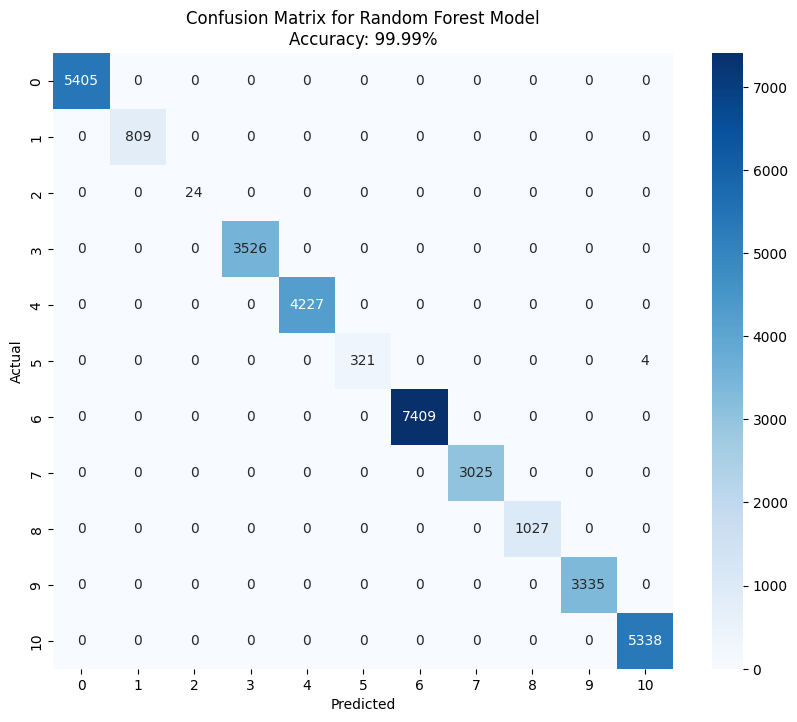

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the trained model to make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(Y_test, y_pred_rf)

# Display the confusion matrix
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model\nAccuracy: {:.2f}%'.format(accuracy_rf * 100))
plt.show()

Support Vector Machine

In [ ]:
import time

from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors

# Define a dictionary mapping integer labels to their corresponding strings
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Assuming you have obtained the output of KNN model as an input array and stored it in the `input_array` variable
input_array = []  # Example input array

# Convert input array back to strings array
output_array = [label_mapping[label] for label in input_array]

# Print out the strings array
print(output_array)

# Take input values from the user
input_N = float(input("Enter the value of N: "))
input_P = float(input("Enter the value of P: "))
input_K = float(input("Enter the value of K: "))
input_temperature = float(input("Enter the value of temperature: "))
input_humidity = float(input("Enter the value of humidity: "))
input_pH = float(input("Enter the value of pH: "))
input_rainfall = float(input("Enter the value of rainfall: "))
input_state = float(input("Enter the state: "))
input_district = float(input("Enter the district: "))
input_month = float(input("Enter the month (1-12): "))

input_parameters = [[input_N, input_P, input_K, input_temperature, input_humidity, input_pH, input_rainfall, input_state, input_district,  input_month]]
input_parameters = scaler.transform(input_parameters)

start_time = time.time()

# Create a SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, Y_train)

# Use the trained model to find the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nearest_neighbors.fit(X_train)

distances, indices = nearest_neighbors.kneighbors(input_parameters)

predicted_labels = [Y_train.iloc[i] for i in indices[0]]

print("Predicted", len(predicted_labels), "nearest label values:", predicted_labels)

predicted_labels = [Y_train.iloc[i] for i in indices[0]]
unique_predicted_labels_svm = list(set(predicted_labels))

# Convert predicted labels to strings array
predicted_strings_svm = [label_mapping[label] for label in unique_predicted_labels_svm]

# Get the predicted labels
predicted_labels_svm = [Y_train.iloc[i] for i in indices[0]]
unique_predicted_labels_svm = list(set(predicted_labels_svm))

print("Unique predicted nearest label values:", unique_predicted_labels_svm)
print("Predicted", len(predicted_strings_svm), "nearest string values:", predicted_strings_svm)

end_time = time.time()
model_building_time_svm = end_time - start_time

print("Model building time: {:.2f} seconds".format(model_building_time_svm))

[]
Enter the value of N: 60
Enter the value of P: 50
Enter the value of K: 30
Enter the value of temperature: 30
Enter the value of humidity: 20
Enter the value of pH: 3
Enter the value of rainfall: 190
Enter the state: 2
Enter the district: 112
Enter the month (1-12): 6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted 5 nearest label values: [4, 4, 4, 4, 4]
Unique predicted nearest label values: [4]
Predicted 1 nearest string values: ['Groundnut']
Model building time: 15.51 seconds


In [ ]:
# Assuming `predicted_strings_svm` is a list of predicted strings
if len(predicted_strings_svm) == 1:
    # Find the min_price, max_price, and modal_price for the single commodity_name
    commodity_name_svm = predicted_strings_svm[0]
    commodity_data = data[data['commodity_name'] == commodity_name_svm]
    min_price_svm = commodity_data['min_price'].max()
    max_price_svm = commodity_data['max_price'].max()
    modal_price_svm = commodity_data['modal_price'].max()

    print("Commodity Name:", commodity_name_svm)
    print("Min Price:", min_price_svm)
    print("Max Price:", max_price_svm)
    print("Modal Price:", modal_price_svm)

elif len(predicted_strings_svm) > 1:
    # Find the min_price, max_price, and modal_price for all commodity_names in predicted_strings_svm
    prices = {}
    for commodity_name_svm in predicted_strings_svm:
        commodity_data = data[data['commodity_name'] == commodity_name_svm]
        min_price = commodity_data['min_price'].max()
        max_price = commodity_data['max_price'].max()
        modal_price = commodity_data['modal_price'].max()
        prices[commodity_name_svm] = {'min_price': min_price, 'max_price': max_price, 'modal_price': modal_price}

    # Find the commodity with the maximum max_price and minimum min_price
    max_max_price = max(prices, key=lambda x: prices[x]['max_price'])
    min_min_price = min(prices, key=lambda x: prices[x]['min_price'])

    print("Commodity Name with Max Max Price:", max_max_price)
    print("Max Price:", prices[max_max_price]['max_price'])
    print("Min Price:", prices[max_max_price]['min_price'])
    print("Modal Price:", prices[max_max_price]['modal_price'])

    print("Commodity Name with Min Min Price:", min_min_price)
    print("Max Price:", prices[min_min_price]['max_price'])
    print("Min Price:", prices[min_min_price]['min_price'])
    print("Modal Price:", prices[min_min_price]['modal_price'])

else:
    # If there are no predicted strings or only one, print the details for that single commodity
    print("Commodity Name:", predicted_strings_svm[0])
    print("Min Price:", min_price_svm)
    print("Max Price:", max_price_svm)
    print("Modal Price:", modal_price_svm)

Commodity Name: Groundnut
Min Price: 110.0
Max Price: 450.9
Modal Price: 118.0


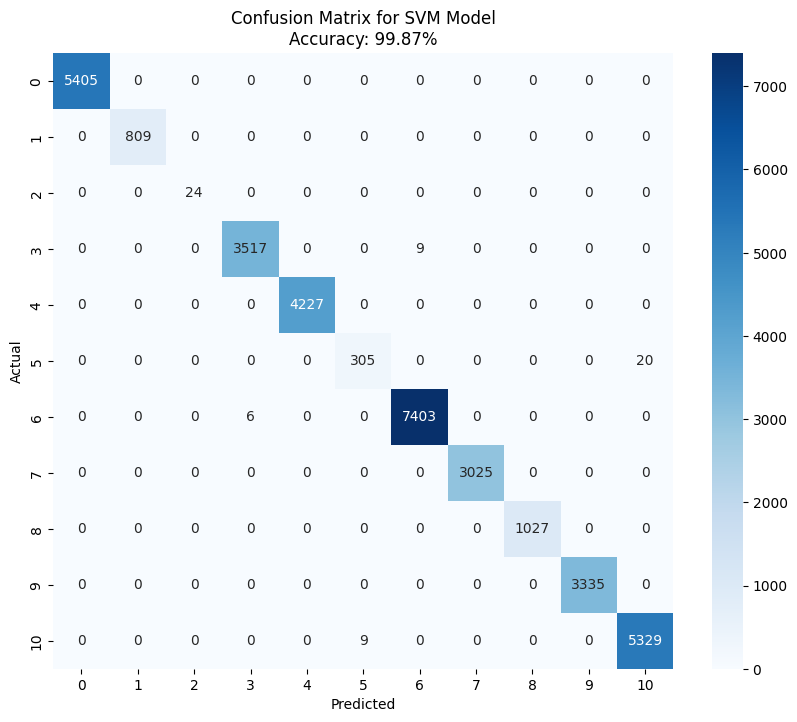

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the trained model to make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(Y_test, y_pred_svm)

# Display the confusion matrix
conf_matrix_svm = confusion_matrix(Y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model\nAccuracy: {:.2f}%'.format(accuracy_svm * 100))
plt.show()

**Result**

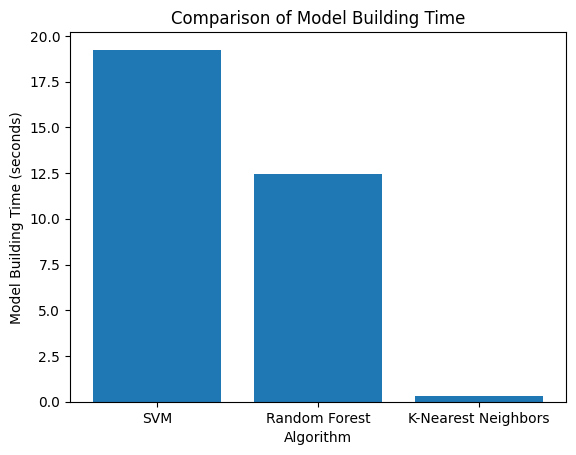

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the values of model_building_time_svm, model_building_time_rf, and model_building_time_knn
model_building_time_svm = 19.24  # Replace with the actual value
model_building_time_rf = 12.45  # Replace with the actual value
model_building_time_knn = 0.30  # Replace with the actual value

# Create a list of algorithm names
algorithms = ['SVM', 'Random Forest', 'K-Nearest Neighbors']

# Create a list of model building times
model_building_times = [model_building_time_svm, model_building_time_rf, model_building_time_knn]

# Create a bar graph
plt.bar(algorithms, model_building_times)

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Model Building Time (seconds)')
plt.title('Comparison of Model Building Time')

# Show the plot
plt.show()